In [7]:
# Importing Necessary Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

import seaborn as sns 
%matplotlib inline
plt.style.use('ggplot')

In [60]:
# Viewing the dataframe from the csv file called Movies.csv 
movies_data =  pd.read_csv('movies.csv')
movies_data.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [30]:
# Format and clean data 

for col in movies_data.columns:
    pct_miss = np.mean(movies_data[col].isnull())
    print('{} - {}%'.format(col, pct_miss))

movies_data.dtypes

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [61]:
# Changeing the dataype of columns 
movies_data['released'] = movies_data['released'].astype(str).str.extract(r'([A-Za-z]+\s+\d{1,2},\s+\d{4})')[0]
movies_data['released'] = pd.to_datetime(movies_data['released'], errors='coerce')

movies_data['YearCor'] = movies_data['released'].dt.year

movies_data['gross'] = movies_data['gross'].fillna(0).astype(int)

movies_data['budget'] = movies_data['budget'].fillna(0).astype(int)
movies_data['YearCor'] = movies_data['YearCor'].fillna(0).astype(int)

In [62]:
movies_data.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCor
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980


In [110]:
# movies_data.sort_values(by=['gross'], inplace=False, ascending=False)

In [66]:
pd.set_option('display.max_rows', None)

In [70]:
#Drop any duplicates 

movies_data['company'].drop_duplicates().sort_values(ascending =False)

# Drop all Duplicates 
# movies_data.drop_duplicates

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [71]:
movies_data.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCor
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [72]:
# what is the colloration between a big gross
# Budget, Company, rating, 

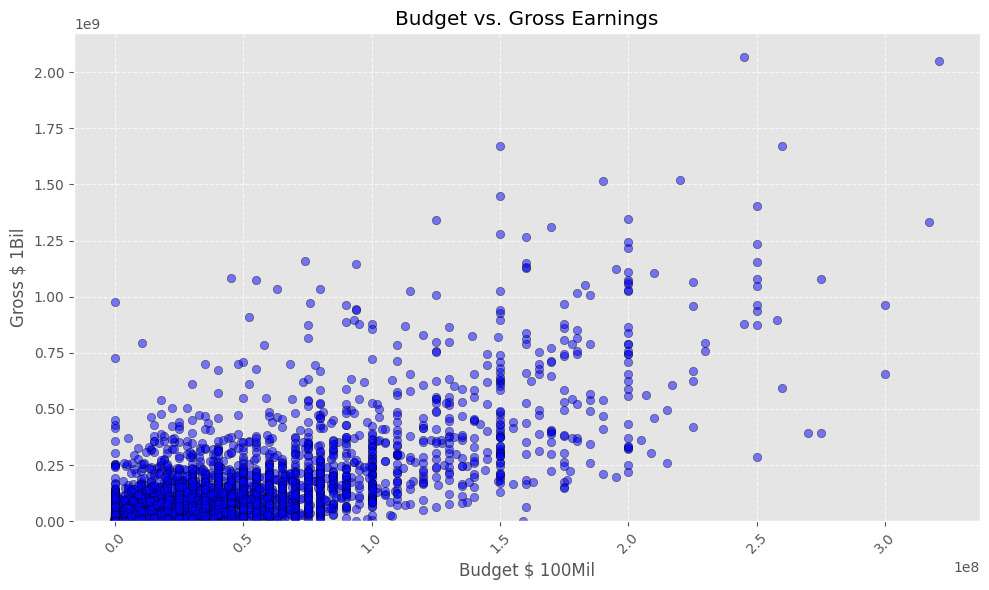

In [88]:
# scatter plot with budget and gross


# Filter out rows where 'gross' is negative
filtered_data = movies_data[movies_data['gross'] >= 0]

# Scatter plot with budget and gross
plt.figure(figsize=(10, 6))
plt.scatter(x=filtered_data['budget'], y=filtered_data['gross'], alpha=0.5, color='b', edgecolors='k')
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Budget $ 100Mil')
plt.ylabel('Gross $ 1Bil')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(bottom=0)  # Set y-axis limit to not include negative values
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

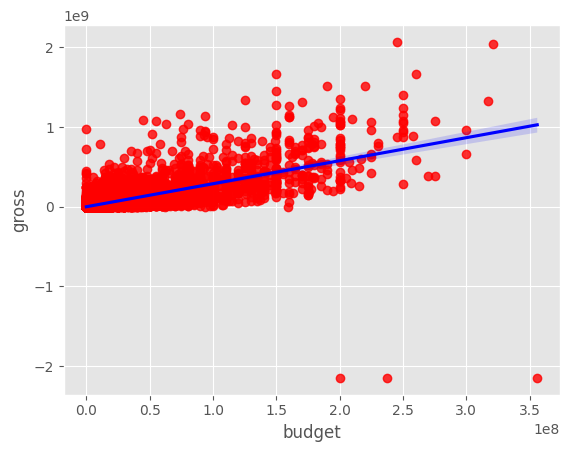

In [90]:
# Plot the Budget vs gross using seaborn 

sns.regplot(x='budget', y='gross', data=movies_data, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [95]:
# Select only numeric columns
numeric_columns = movies_data.select_dtypes(include=['int', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr(method='pearson')

# Display correlation matrix
print(correlation_matrix)

             year     score     votes    budget     gross   runtime   YearCor
year     1.000000  0.097995  0.222945  0.309212  0.256331  0.120811  0.143738
score    0.097995  1.000000  0.409182  0.055665  0.169406  0.399451  0.001653
votes    0.222945  0.409182  1.000000  0.486862  0.573889  0.309212  0.056070
budget   0.309212  0.055665  0.486862  1.000000  0.687124  0.269510  0.073969
gross    0.256331  0.169406  0.573889  0.687124  1.000000  0.204177  0.055681
runtime  0.120811  0.399451  0.309212  0.269510  0.204177  1.000000  0.027707
YearCor  0.143738  0.001653  0.056070  0.073969  0.055681  0.027707  1.000000


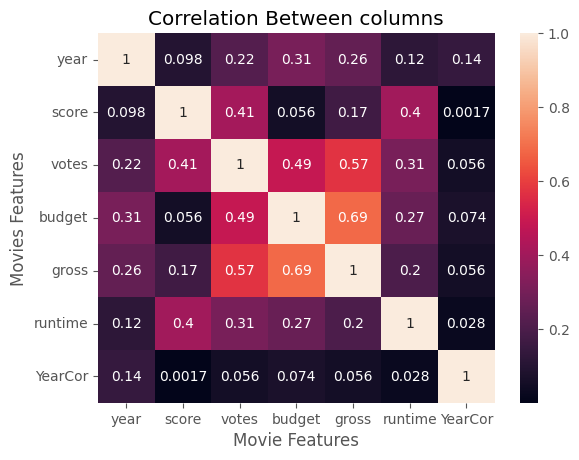

In [98]:
#Hogh correlation bettween budget and gross
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Between columns')
plt.xlabel('Movie Features')
plt.ylabel('Movies Features')

plt.show()

In [111]:
#Assing a numerical value to all columns  
movies_data_num = movies_data

for col_name in movies_data_num.columns:
    if(movies_data_num[col_name].dtype == 'object'):
        movies_data_num[col_name] = movies_data_num[col_name].astype('category')
        movies_data_num[col_name] = movies_data_num[col_name].cat.codes
movies_data_num.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCor
0,6587,6,6,1980,1980-06-13,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,1980
1,5573,6,1,1980,1980-07-02,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,1980
2,5142,4,0,1980,1980-06-20,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,1980
3,286,4,4,1980,1980-07-02,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,1980
4,1027,6,4,1980,1980-07-25,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,1980


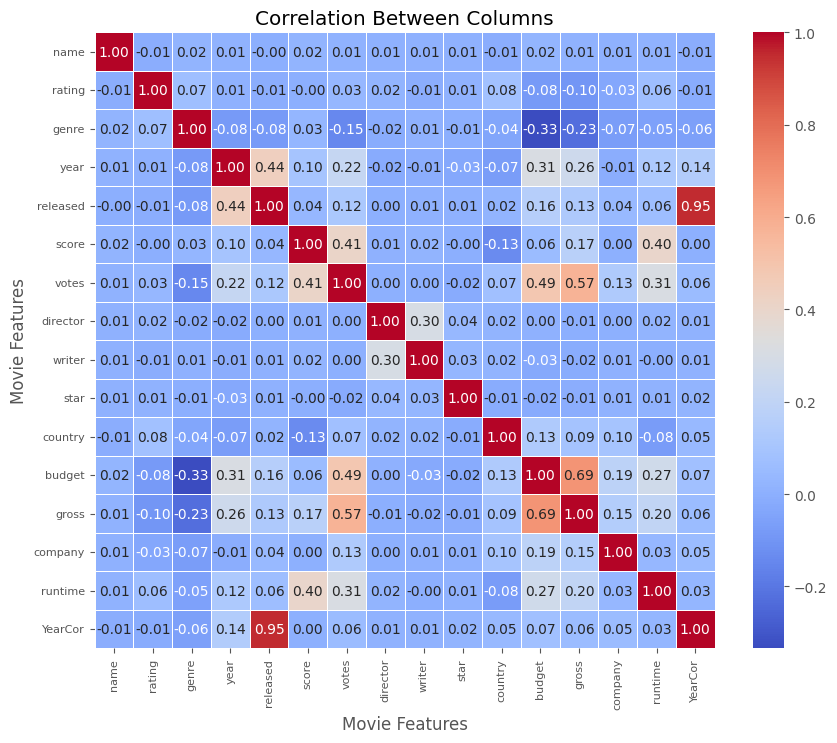

In [103]:


# Calculate correlation matrix
correlation_matrix = movies_data_num.corr(method='pearson')

# Set figure size
plt.figure(figsize=(10, 8))

# Create heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Set title and axis labels
plt.title('Correlation Between Columns')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# Adjust font size of annotations
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Show plot
plt.show()


In [104]:
movies_data_num.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCor
name,1.000000,-0.008069,0.016355,0.011453,-0.004951,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.013895,0.009211,0.010392,-0.009264
rating,-0.008069,1.000000,0.072423,0.008779,-0.010258,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095355,-0.032943,0.062145,-0.013129
genre,0.016355,0.072423,1.000000,-0.081261,-0.080051,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.229534,-0.071067,-0.052711,-0.061689
year,0.011453,0.008779,-0.081261,1.000000,0.438382,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.256331,-0.010431,0.120811,0.143738
released,-0.004951,-0.010258,-0.080051,0.438382,1.000000,0.035082,0.118998,0.003426,0.008115,0.006276,0.016837,0.160726,0.128314,0.042653,0.063762,0.952036
score,0.017097,-0.001314,0.027965,0.097995,0.035082,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.169406,0.001030,0.399451,0.001653
votes,0.013088,0.033225,-0.145307,0.222945,0.118998,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.573889,0.133204,0.309212,0.056070
director,0.009079,0.019483,-0.015258,-0.020795,0.003426,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.005615,0.004404,0.017624,0.010682
writer,0.009081,-0.005921,0.006567,-0.008656,0.008115,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.015602,0.005646,-0.003511,0.011463
star,0.006472,0.013405,-0.005477,-0.027242,0.006276,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.010628,0.012442,0.010174,0.016025


In [113]:
correlation_mat = movies_data_num.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head(10)

name  name      1.000000
      rating   -0.008069
      genre     0.016355
      year      0.011453
dtype: float64

In [114]:
sorted_values = corr_pairs.sort_values()
sorted_values.head(10)

budget   genre     -0.334021
genre    budget    -0.334021
         gross     -0.229534
gross    genre     -0.229534
votes    genre     -0.145307
genre    votes     -0.145307
score    country   -0.133348
country  score     -0.133348
rating   gross     -0.095355
gross    rating    -0.095355
dtype: float64

In [115]:
high_corr = sorted_values[(sorted_values) > 0.5]
high_corr.head(10)


gross     votes       0.573889
votes     gross       0.573889
budget    gross       0.687124
gross     budget      0.687124
YearCor   released    0.952036
released  YearCor     0.952036
name      name        1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
dtype: float64

In [109]:
#Votes and Budget seem to match the correlation to Gross